# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [1]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
analysis_notes=[["dataframe", "note", "fixed"]]

### Load dataset

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")
df=df0.copy()

# Display first few rows of the dataframe
### YOUR CODE HERE ###
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
def get_df_info(df):
    print ("Dataframe shape: {} \n".format(df.shape))
    print ("Dataframe info:")
    df.info()
    print ("\nColumn info:")
    columns=df.columns
    for col in columns:
        values=sorted(list(df[col].unique()))
        if len(values)<10:
            print ("    Values in {}: {}".format(col, values))
        else:
            print ("    Values in {}: Multiple".format(col))
        
    return columns

columns=get_df_info(df)

Dataframe shape: (14999, 10) 

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB

Column info:
    Values in satisfaction_level: Multiple
    Values in last_evaluation: Multiple
    Values in number_project: [np.int64(2), np.int64(3), np.i

### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
# Display all column names
columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
column_dict={"satisfaction_level":"satisfaction",
             "last_evaluation":"performance_scr",
             "number_project": "projects_num",
             "average_montly_hours": "monthly_hours_av",
             "time_spend_company": "tenure_yrs",
             "Work_accident":"work_accident",
             "promotion_last_5years": "promotion",
             "Department": "department"}

df.rename(columns=column_dict, inplace=True)

# Update column list and display all column names after the update
columns=df.columns
columns

Index(['satisfaction', 'performance_scr', 'projects_num', 'monthly_hours_av',
       'tenure_yrs', 'work_accident', 'left', 'promotion', 'department',
       'salary'],
      dtype='object')

### Check missing values

In [7]:
# Check for missing values
missing=df.isna().sum()
n=0
for s in missing:
    if s>0:
        n+=1
text="{} columns have missing values".format(n)
print (text)
missing

0 columns have missing values


satisfaction        0
performance_scr     0
projects_num        0
monthly_hours_av    0
tenure_yrs          0
work_accident       0
left                0
promotion           0
department          0
salary              0
dtype: int64

In [8]:
analysis_notes.append(["df", text, "NA"])

### Check duplicates

In [9]:
# Check for duplicates
dups=df.duplicated(keep="first")
text="{} ({:.2f}%) rows are duplicated".format(dups.sum(), dups.sum()/len(dups)*100)
print (text)

3008 (20.05%) rows are duplicated


In [10]:
analysis_notes.append(["df", text, "will remove duplicate values"])

In [11]:
# Inspect some rows containing duplicates as needed
df[dups].head(10)

satisfaction  performance_scr  projects_num  monthly_hours_av  \
396            0.46             0.57             2               139   
866            0.41             0.46             2               128   
1317           0.37             0.51             2               127   
1368           0.41             0.52             2               132   
1461           0.42             0.53             2               142   
1516           0.40             0.50             2               127   
1616           0.37             0.46             2               156   
1696           0.39             0.56             2               160   
1833           0.10             0.85             6               266   
12000          0.38             0.53             2               157   

       tenure_yrs  work_accident  left  promotion  department  salary  
396             3              0     1          0       sales     low  
866             3              0     1          0  accounting     low  
1317            3              0     1          0       sales  medium  
1368            3              0     1          0       RandD     low  
1461            3              0     1          0       sales     low  
1516            3              0     1          0          IT     low  
1616            3              0     1          0       sales     low  
1696            3              0     1          0       sales     low  
1833            4              0     1          0       sales     low  
12000           3              0     1          0       sales     low

In [12]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df_unq=df[~dups]
dups2=df_unq.duplicated(keep="first")
text="{} ({:.2f}%) rows are duplicated".format(dups2.sum(), dups2.sum()/len(dups2)*100)
print (text + "\n")
get_df_info(df_unq)

# Display first few rows of new dataframe as needed
df_unq.head(5)

0 (0.00%) rows are duplicated

Dataframe shape: (11991, 10) 

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   satisfaction      11991 non-null  float64
 1   performance_scr   11991 non-null  float64
 2   projects_num      11991 non-null  int64  
 3   monthly_hours_av  11991 non-null  int64  
 4   tenure_yrs        11991 non-null  int64  
 5   work_accident     11991 non-null  int64  
 6   left              11991 non-null  int64  
 7   promotion         11991 non-null  int64  
 8   department        11991 non-null  object 
 9   salary            11991 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.0+ MB

Column info:
    Values in satisfaction: Multiple
    Values in performance_scr: Multiple
    Values in projects_num: [np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int6

satisfaction  performance_scr  projects_num  monthly_hours_av  tenure_yrs  \
0          0.38             0.53             2               157           3   
1          0.80             0.86             5               262           6   
2          0.11             0.88             7               272           4   
3          0.72             0.87             5               223           5   
4          0.37             0.52             2               159           3   

   work_accident  left  promotion department  salary  
0              0     1          0      sales     low  
1              0     1          0      sales  medium  
2              0     1          0      sales  medium  
3              0     1          0      sales     low  
4              0     1          0      sales     low

In [13]:
analysis_notes.append(["df_unq", text, "NA"])

### Check outliers

<Axes: xlabel='tenure_yrs'>

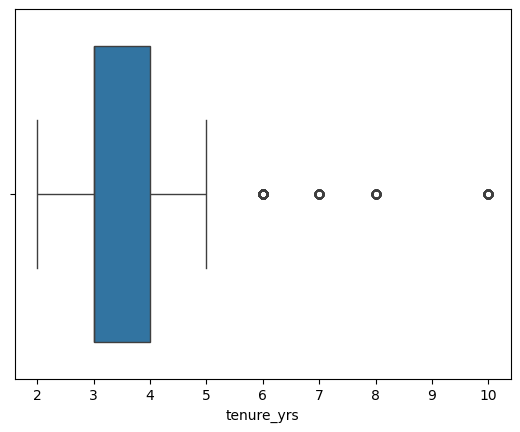

In [14]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(data=df_unq, x="tenure_yrs")

In [15]:
# Determine the number of rows containing outliers
def identify_outliers(df, col):
    # Calculate percentiles
    pctiles = []
    for p in [.25, .75]:
        pctiles.append(df[col].quantile(p))

    iqr = pctiles[1]-pctiles[0]
    
    limits = [pctiles[0]-1.5*iqr, pctiles[1]+1.5*iqr]
    outliers = [(df[col]<limits[0]), (df[col]>limits[1])]
    print ("Lower Limit for Outliers in Column {} = {}".format(col, limits[0]))
    print ("    There are {} Outliers".format(outliers[0].sum()))

    print ("Upper Limit for Outliers in Column {} = {}".format(col, limits[1]))
    print ("    There are {} Outliers".format(outliers[1].sum()))

    return (limits,outliers)

limits,outs=identify_outliers(df_unq, "tenure_yrs")


Lower Limit for Outliers in Column tenure_yrs = 1.5
    There are 0 Outliers
Upper Limit for Outliers in Column tenure_yrs = 5.5
    There are 824 Outliers


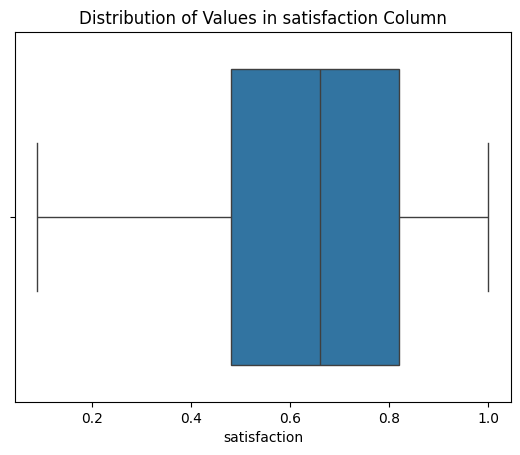

Lower Limit for Outliers in Column satisfaction = -0.030000000000000027
    There are 0 Outliers
Upper Limit for Outliers in Column satisfaction = 1.33
    There are 0 Outliers


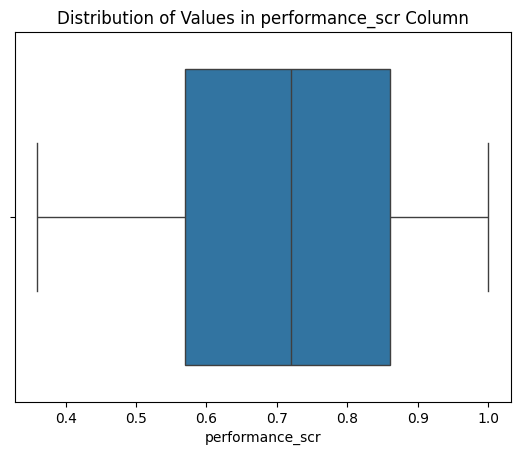

Lower Limit for Outliers in Column performance_scr = 0.1349999999999999
    There are 0 Outliers
Upper Limit for Outliers in Column performance_scr = 1.295
    There are 0 Outliers


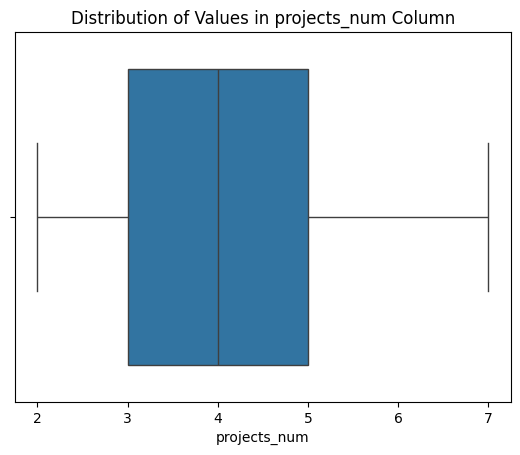

Lower Limit for Outliers in Column projects_num = 0.0
    There are 0 Outliers
Upper Limit for Outliers in Column projects_num = 8.0
    There are 0 Outliers


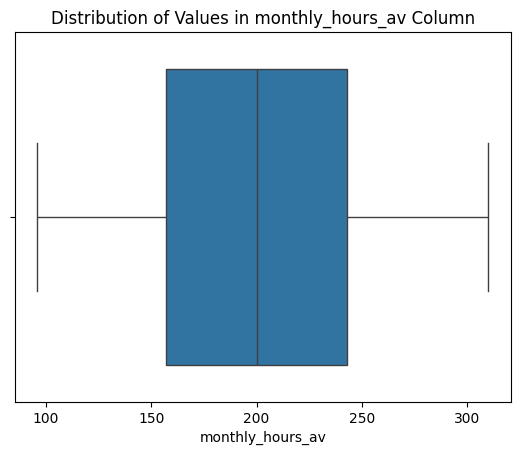

Lower Limit for Outliers in Column monthly_hours_av = 28.0
    There are 0 Outliers
Upper Limit for Outliers in Column monthly_hours_av = 372.0
    There are 0 Outliers


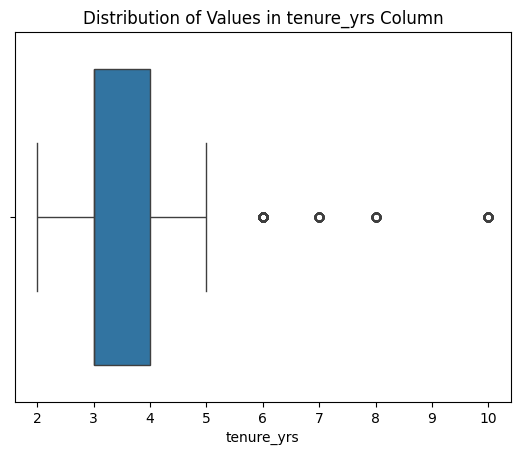

Lower Limit for Outliers in Column tenure_yrs = 1.5
    There are 0 Outliers
Upper Limit for Outliers in Column tenure_yrs = 5.5
    There are 824 Outliers
Column tenure_yrs has outliers


In [16]:
outliers={}

for col in columns:
    if df_unq[col].dtype != "object" and len(df_unq[col].unique())>2:
        sns.boxplot(data=df_unq, x=col)
        plt.title("Distribution of Values in {} Column".format(col))
        plt.show()
        
        limits, outs=identify_outliers(df_unq, col)
        
        if sum([e.sum() for e in outs])>0:
            outliers[col]=outs
            print ("Column {} has outliers".format(col))

In [17]:
analysis_notes.append(["df_unq", "There are 824 outliers in column tenure_yrs", 
                       "will make thresholded column tenure_thresh that maxes value out at 5.5 yrs"])

In [18]:
df_unq["tenure_thresh"]=df_unq["tenure_yrs"].apply(lambda x: 5 if x>5 else x)
columns=get_df_info(df_unq)

Dataframe shape: (11991, 11) 

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   satisfaction      11991 non-null  float64
 1   performance_scr   11991 non-null  float64
 2   projects_num      11991 non-null  int64  
 3   monthly_hours_av  11991 non-null  int64  
 4   tenure_yrs        11991 non-null  int64  
 5   work_accident     11991 non-null  int64  
 6   left              11991 non-null  int64  
 7   promotion         11991 non-null  int64  
 8   department        11991 non-null  object 
 9   salary            11991 non-null  object 
 10  tenure_thresh     11991 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.1+ MB

Column info:
    Values in satisfaction: Multiple
    Values in performance_scr: Multiple
    Values in projects_num: [np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.i

/tmp/ipykernel_4883/1432496140.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unq["tenure_thresh"]=df_unq["tenure_yrs"].apply(lambda x: 5 if x>5 else x)


# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [19]:
# Get numbers of people who left vs. stayed
def get_group_counts(df, grp_col:str, agg_col:str, grp_name:str ):
    grps=df.groupby(grp_col).agg({agg_col:"count"}).rename(columns={agg_col:"count"})
    grps["name"]=grp_name
    
    grps["pcts"]=grps["count"].apply(lambda x: x/len(df)*100)

    return grps

grp_unq=get_group_counts(df_unq, "left", "satisfaction", "df with unqiue reads")
grps=pd.concat([grp_unq, get_group_counts(df, "left", "satisfaction", "df original")])


text="16.6% of people left the company"
print (text)
grps

16.6% of people left the company


count                  name       pcts
left                                        
0     10000  df with unqiue reads  83.395880
1      1991  df with unqiue reads  16.604120
0     11428           df original  76.191746
1      3571           df original  23.808254

In [20]:
analysis_notes.append(["df_unq", text, "Upsampling may be needed"])

### Encode Categorical Values

In [21]:
encoding_key={}

for col in ["department", "salary"]:
    if col=="department":
        values=sorted(df_unq[col].unique(), key=str.casefold)
    else:
        values=["low", "medium", "high"]
        
    encoding_key[col]={}
    n=0
    for v in values:
        encoding_key[col][v]=n
        n+=1

In [22]:
df_unq["department_val"]=df_unq["department"].apply(lambda x: encoding_key["department"][x])
df_unq["salary_val"]=df_unq["salary"].apply(lambda x: encoding_key["salary"][x])

columns=get_df_info(df_unq)

Dataframe shape: (11991, 13) 

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
Index: 11991 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   satisfaction      11991 non-null  float64
 1   performance_scr   11991 non-null  float64
 2   projects_num      11991 non-null  int64  
 3   monthly_hours_av  11991 non-null  int64  
 4   tenure_yrs        11991 non-null  int64  
 5   work_accident     11991 non-null  int64  
 6   left              11991 non-null  int64  
 7   promotion         11991 non-null  int64  
 8   department        11991 non-null  object 
 9   salary            11991 non-null  object 
 10  tenure_thresh     11991 non-null  int64  
 11  department_val    11991 non-null  int64  
 12  salary_val        11991 non-null  int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 1.3+ MB

Column info:
    Values in satisfaction: Multiple
    Values in performance_scr: 

/tmp/ipykernel_4883/742008574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unq["department_val"]=df_unq["department"].apply(lambda x: encoding_key["department"][x])
/tmp/ipykernel_4883/742008574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unq["salary_val"]=df_unq["salary"].apply(lambda x: encoding_key["salary"][x])


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

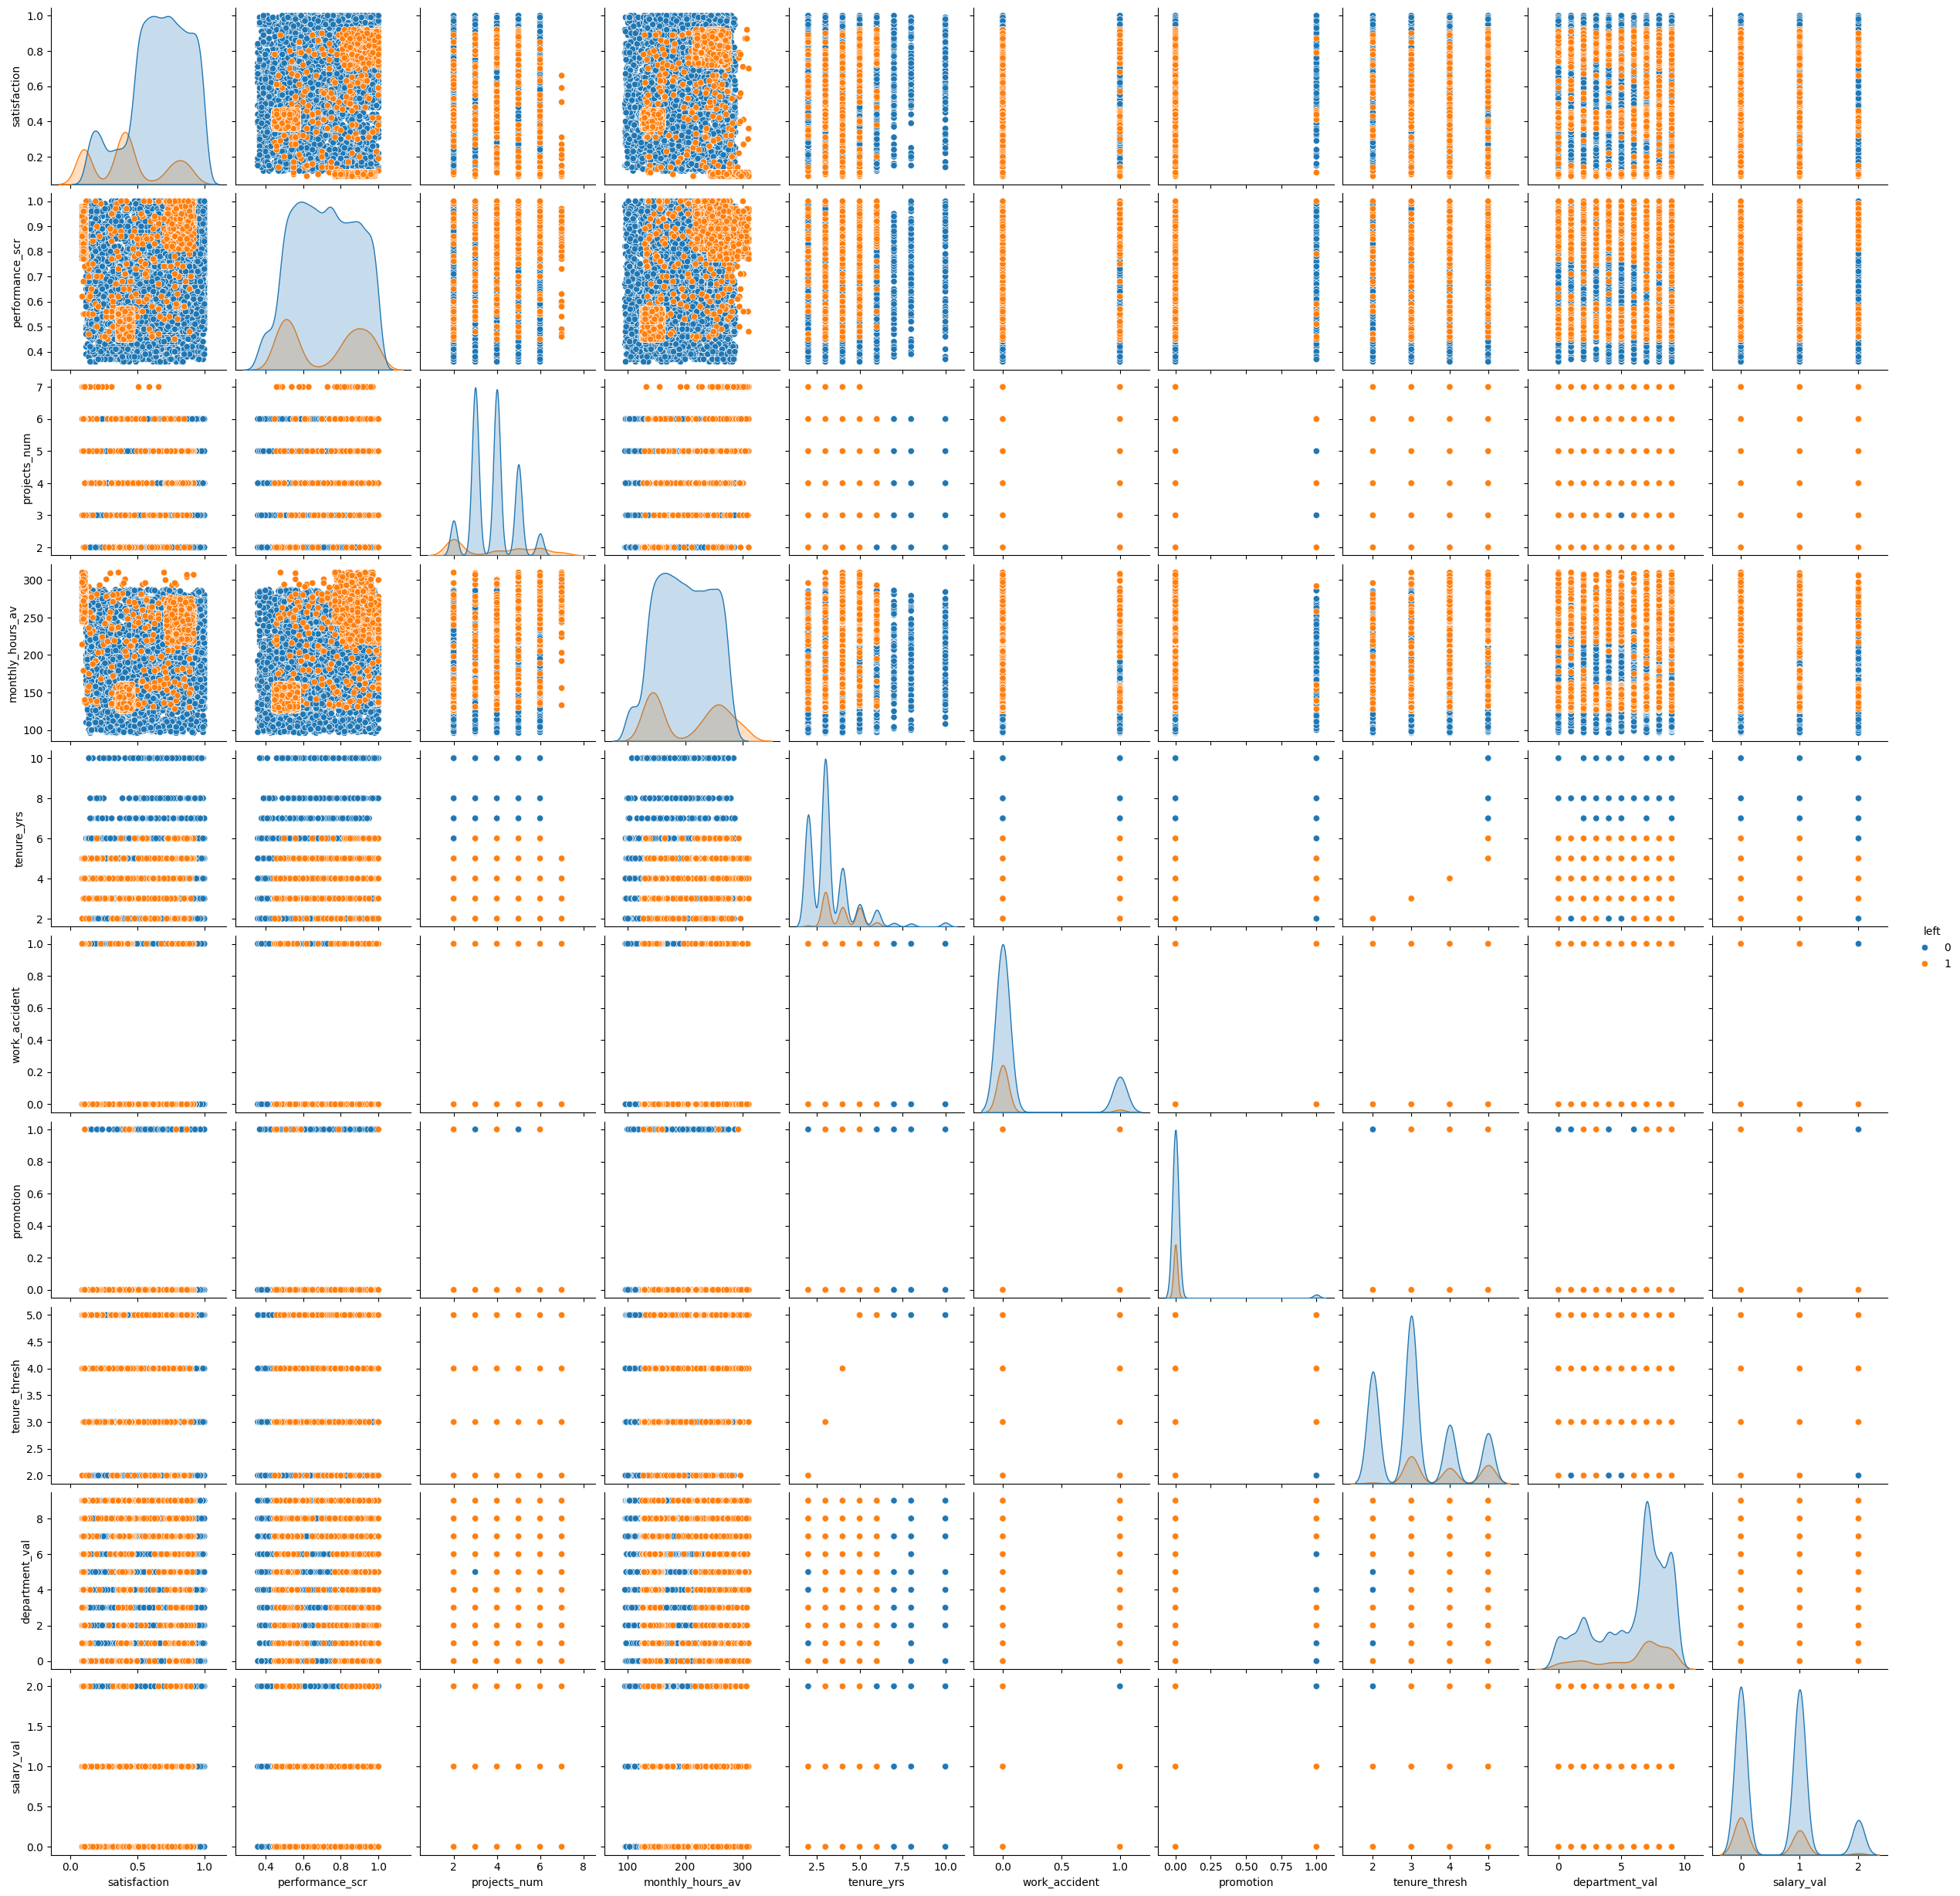

In [23]:
df_unq=df_unq.sort_values(by="left")
sns.pairplot(df_unq, hue="left")

In [24]:
# Create a plot as needed
def kde_scatterplot(df, col1, col2, hue_col):
    sns.scatterplot(data=df, x=col1, y=col2, hue=hue_col, hue_order=[0,1])
    sns.kdeplot(data=df,  x=col1, y=col2, linewidths=1, hue=hue_col, hue_order=[0,1])
    plt.title("{} vs {}".format(col1, col2))
    plt.show()
    
def make_boxplot(df, col1, col2, hue_col):
    if col1 in ["satisfaction", "monthly_hours_av", "performance_scr"]:
        x=col2
        y=col1
    else:
        x=col1
        y=col2
        
    sns.boxplot(data=df, x=x, y=y, hue=hue_col)
    plt.title("{} vs {}".format(x, y))

    plt.show()

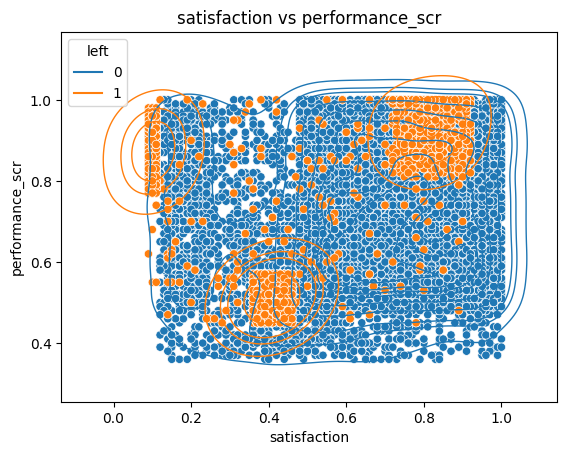

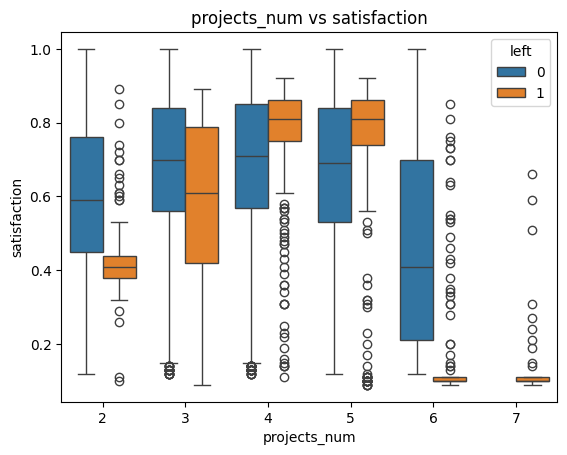

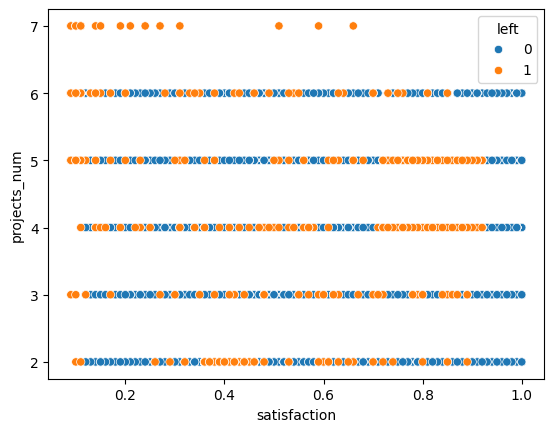

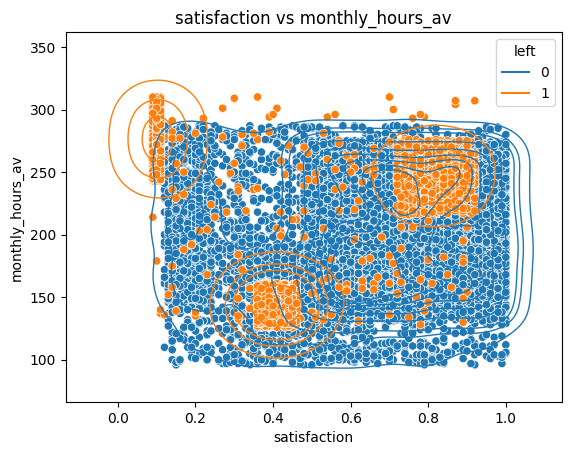

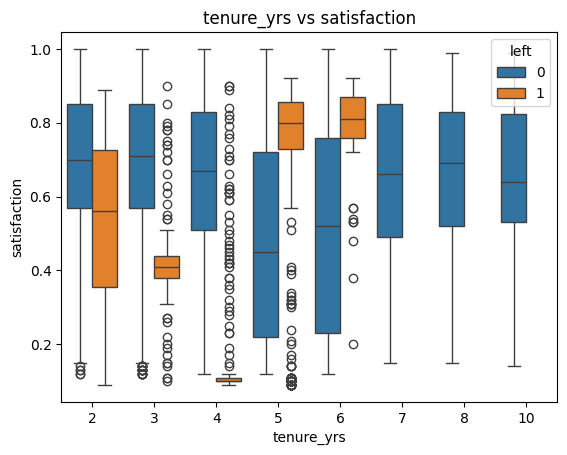

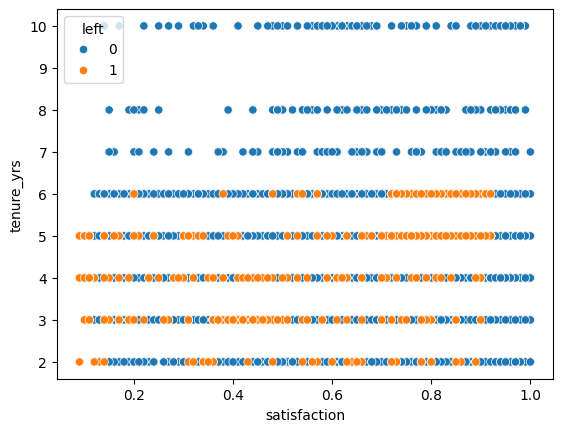

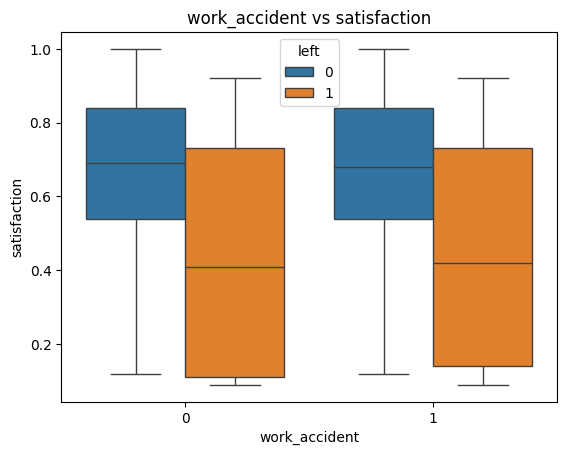

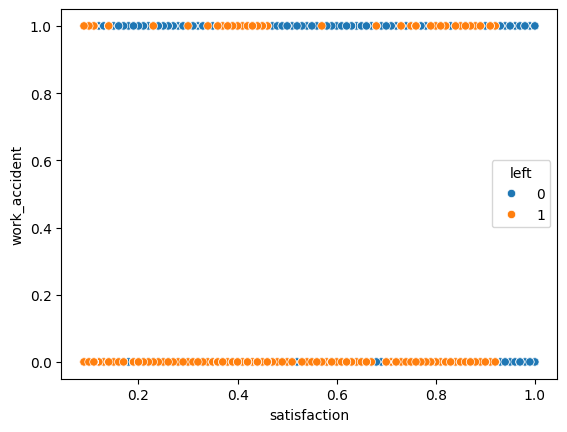

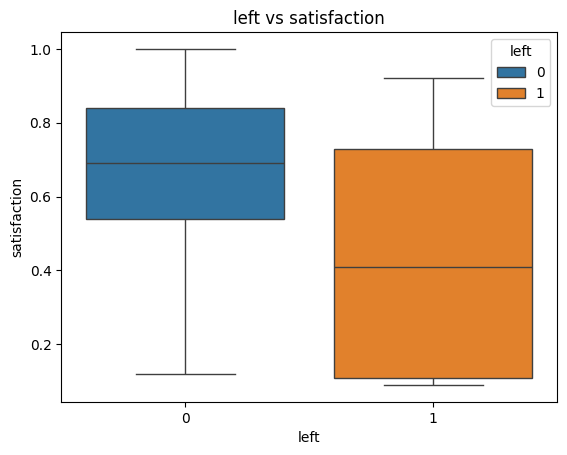

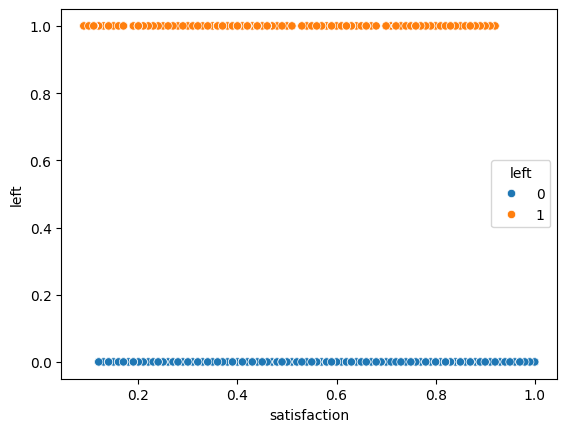

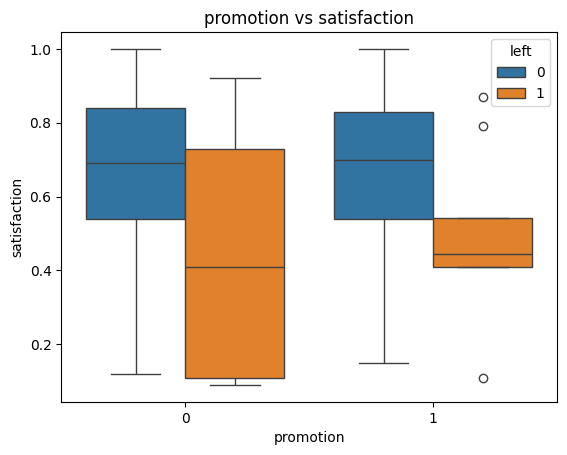

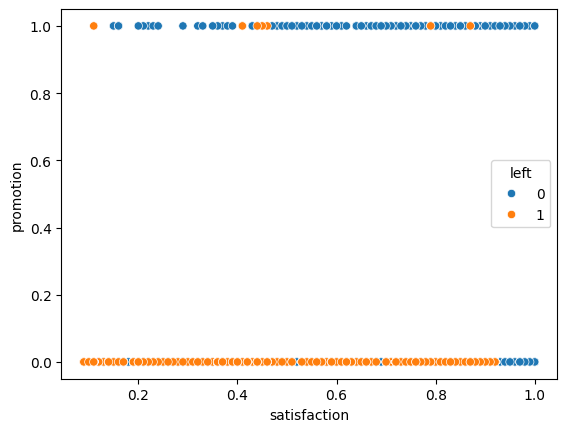

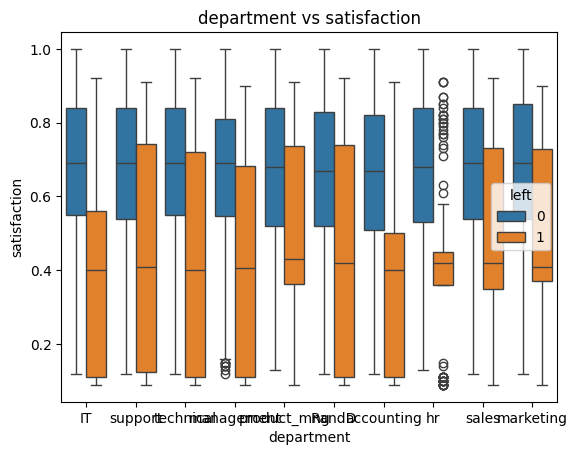

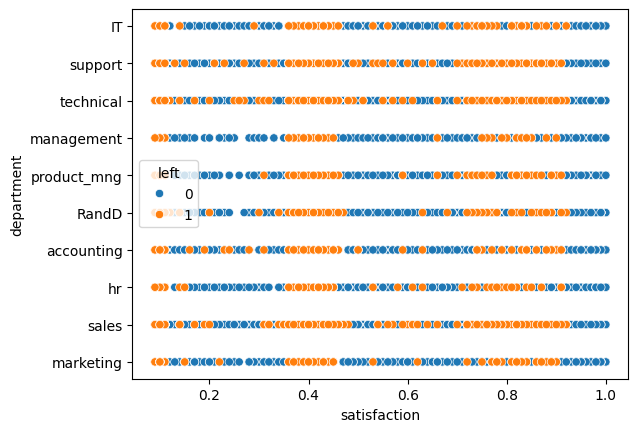

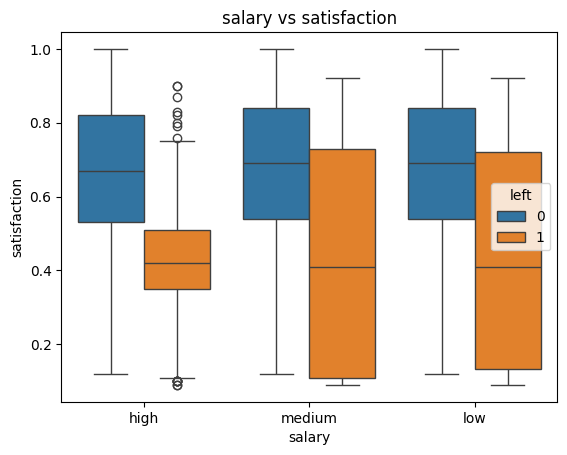

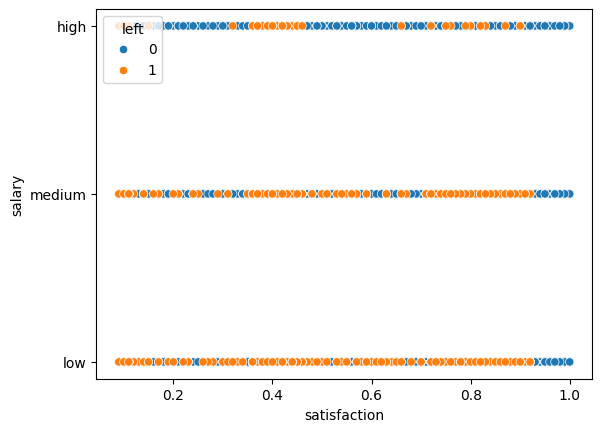

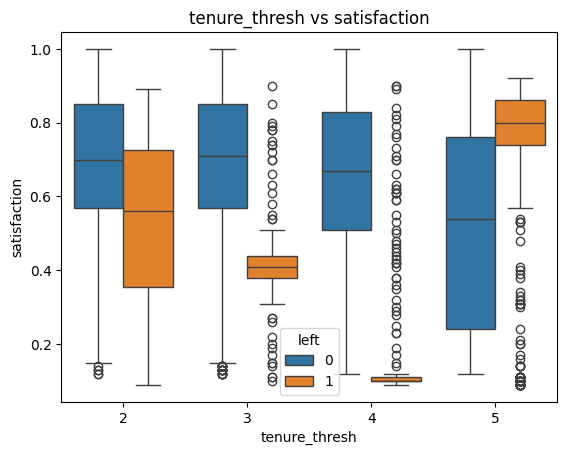

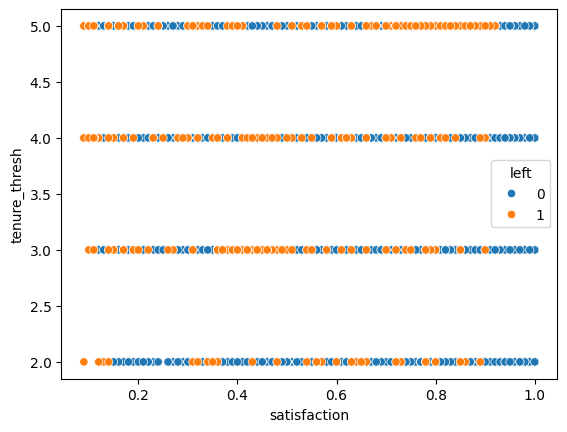

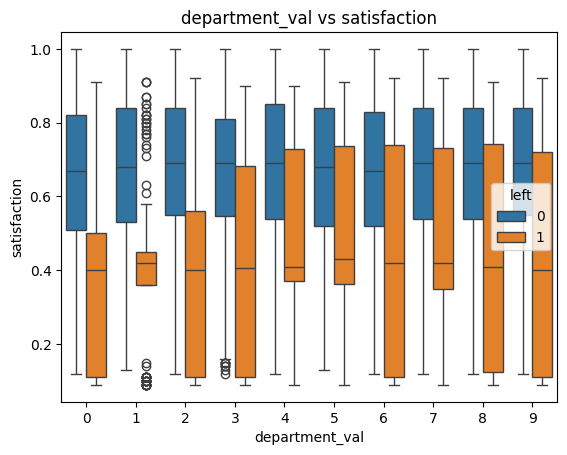

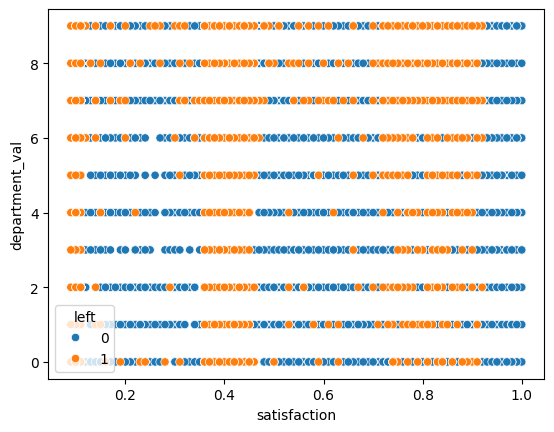

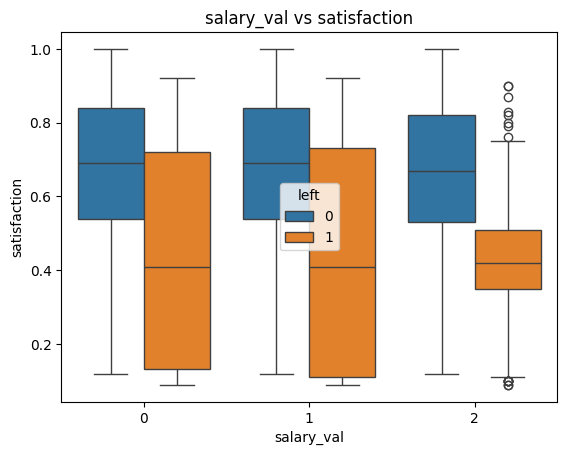

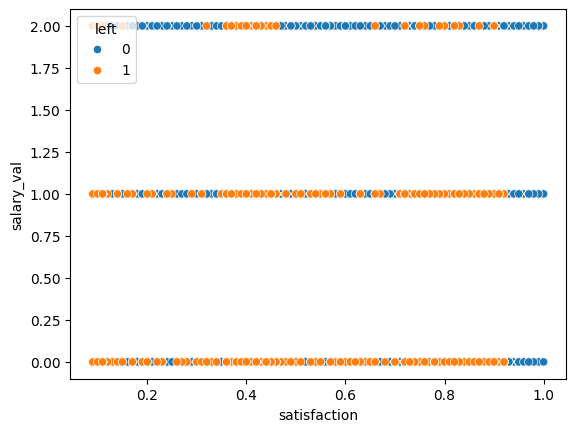

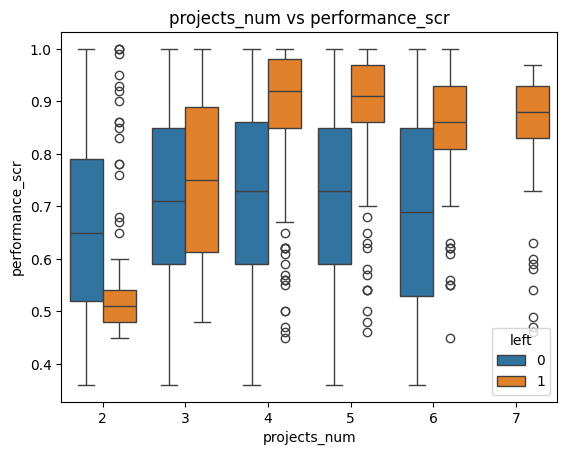

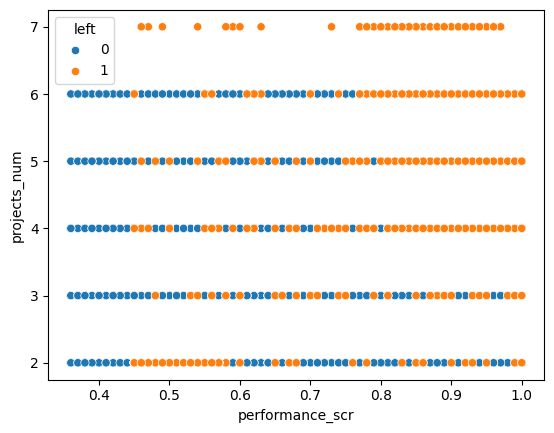

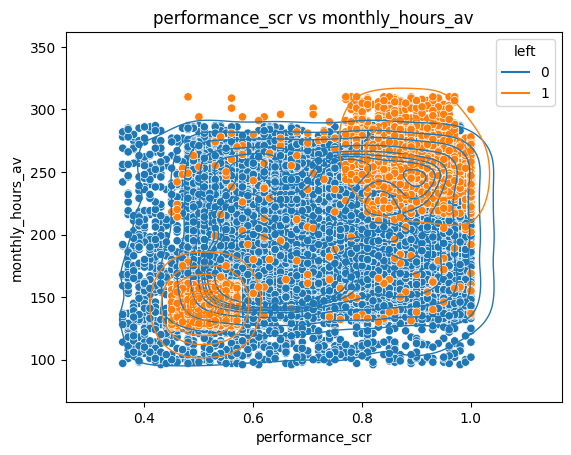

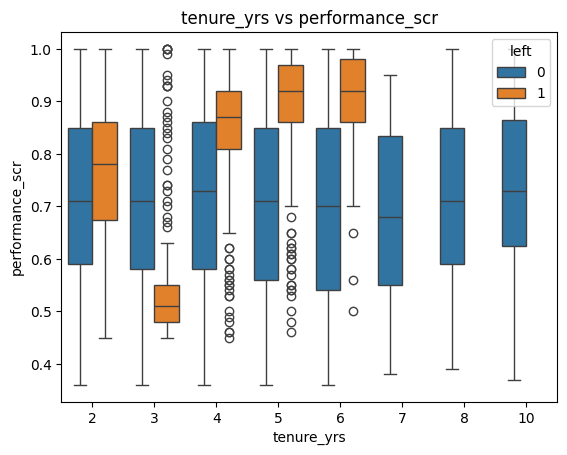

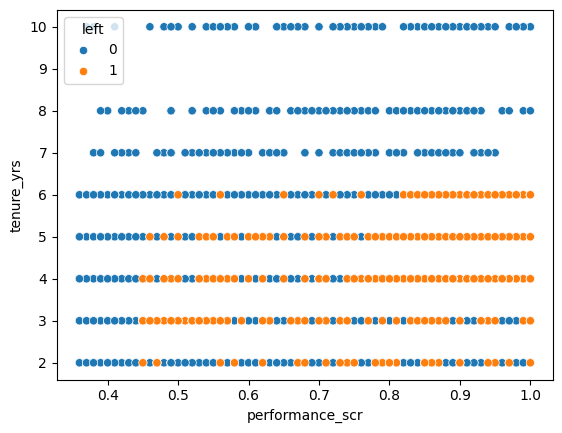

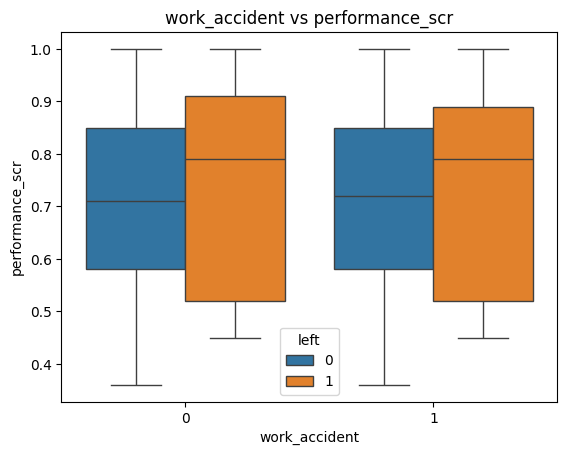

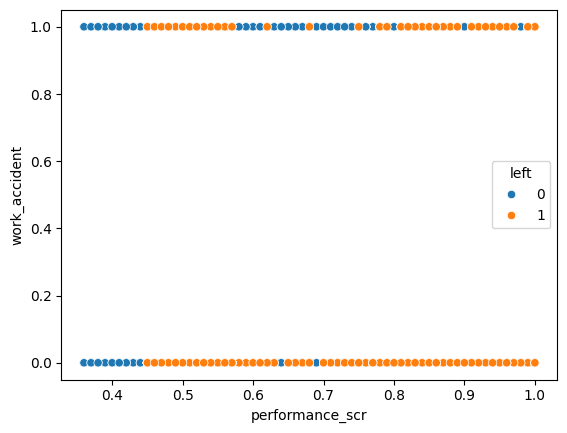

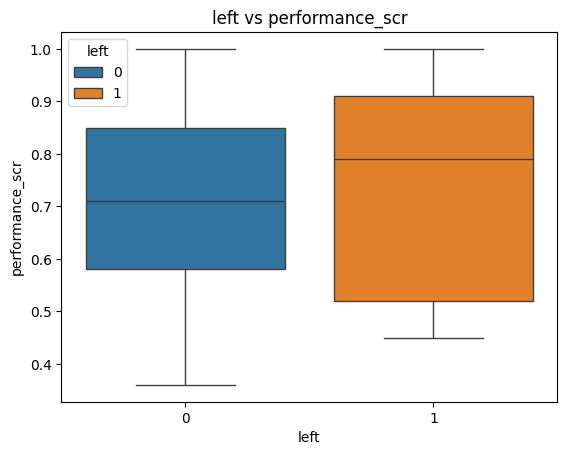

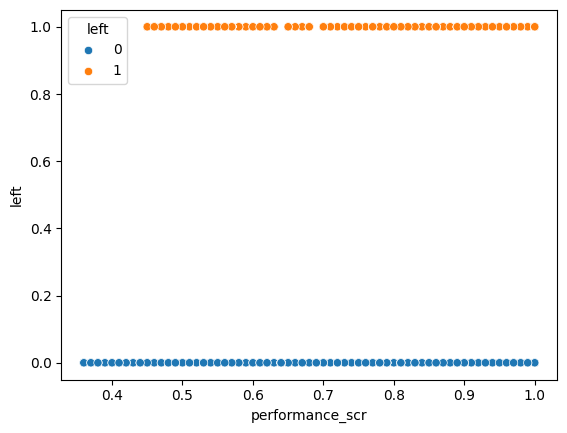

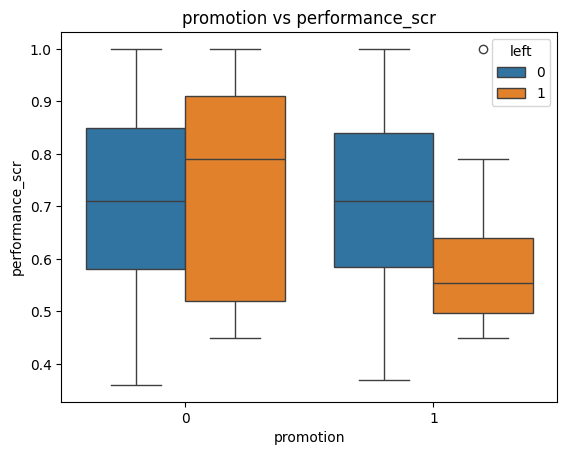

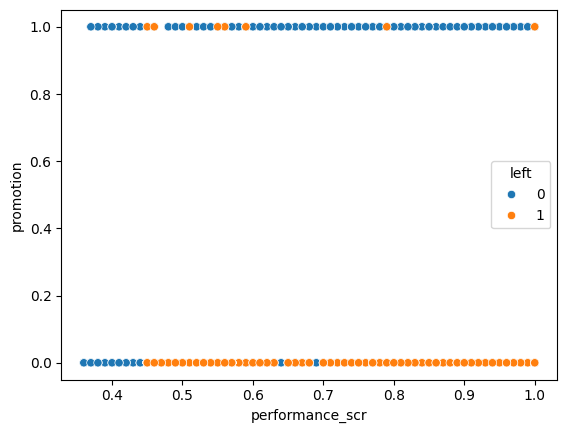

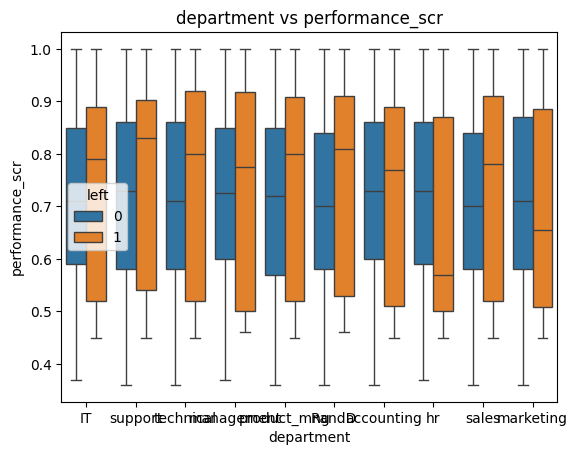

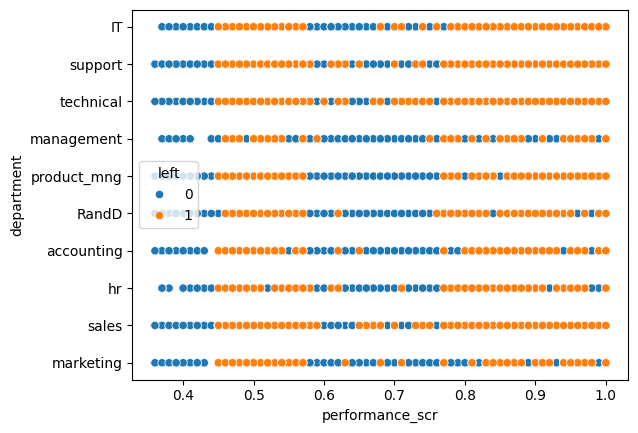

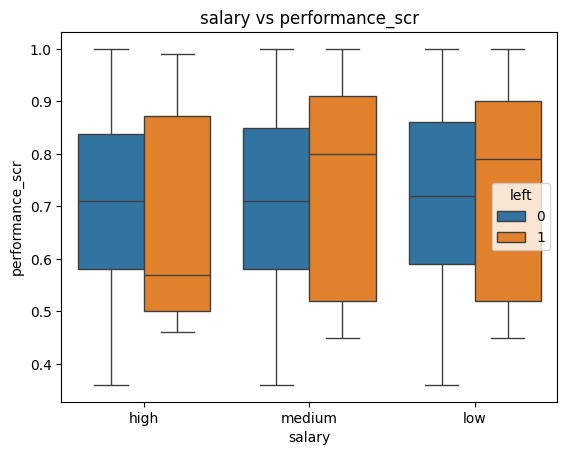

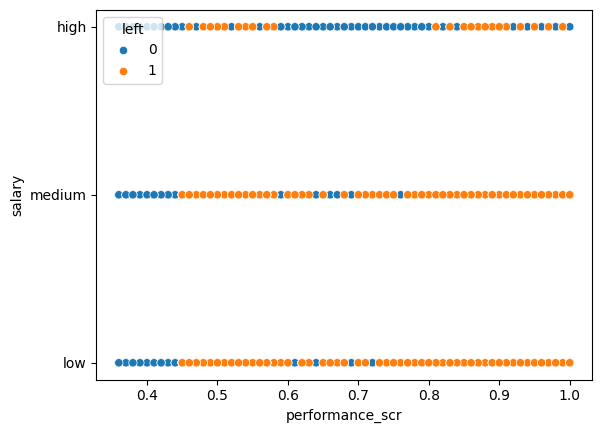

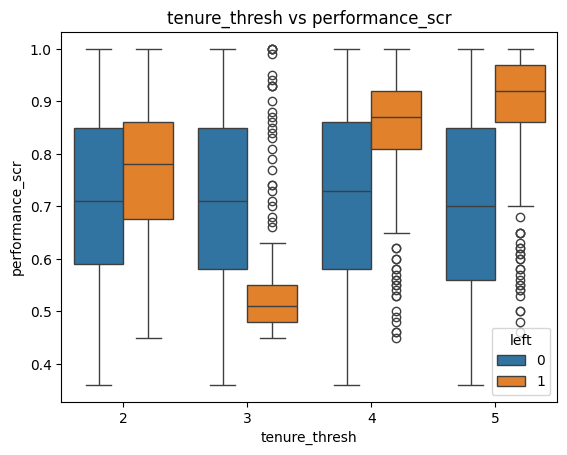

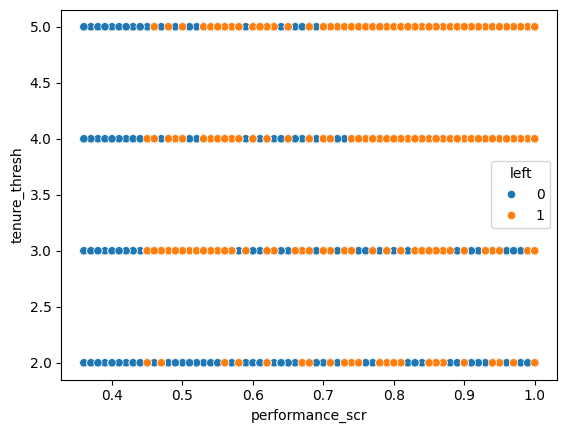

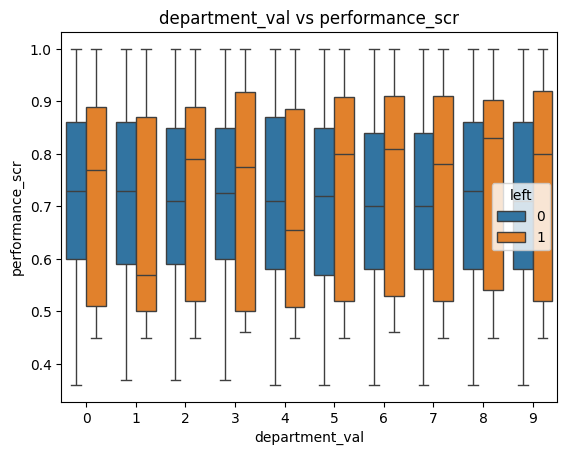

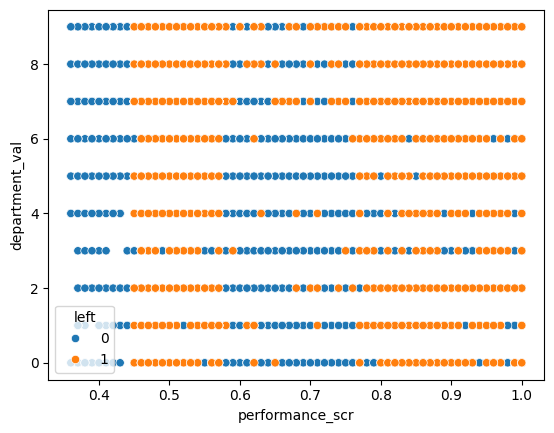

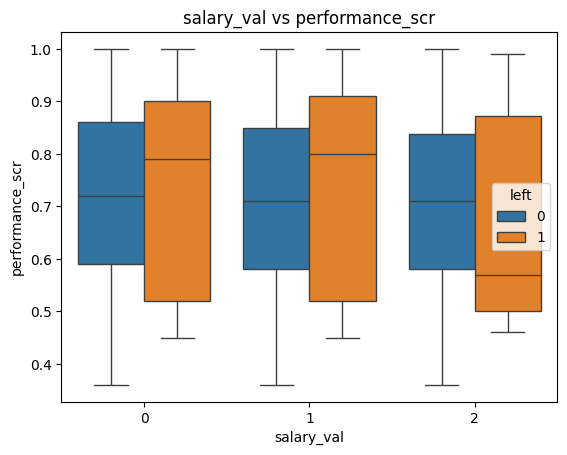

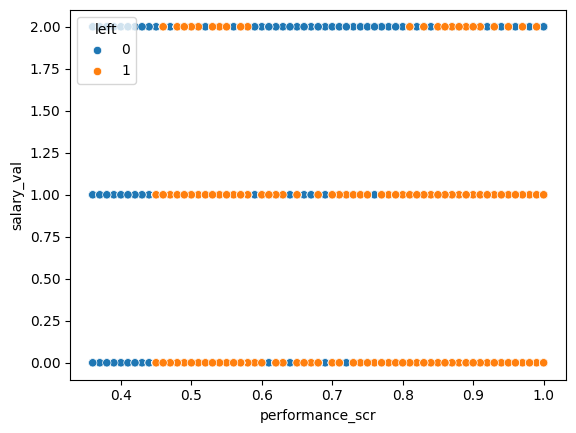

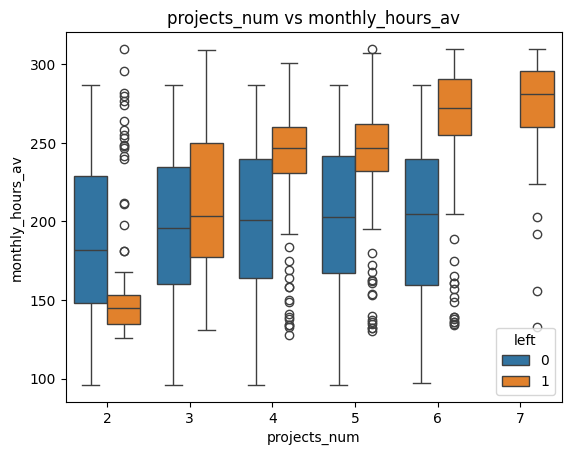

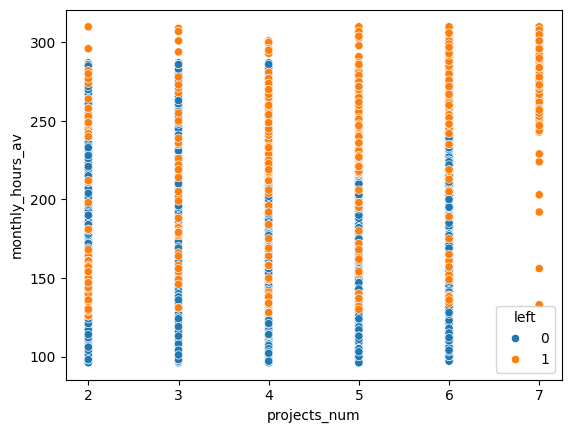

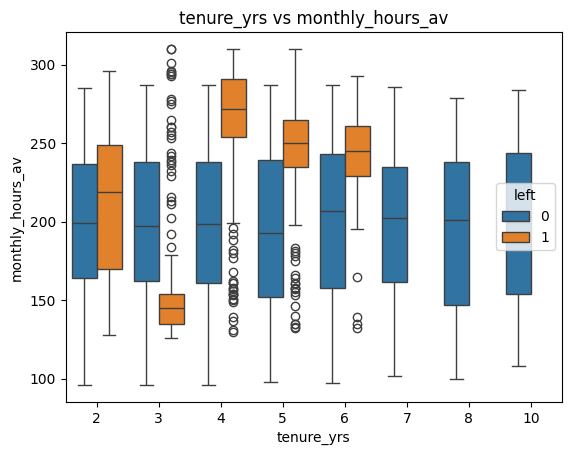

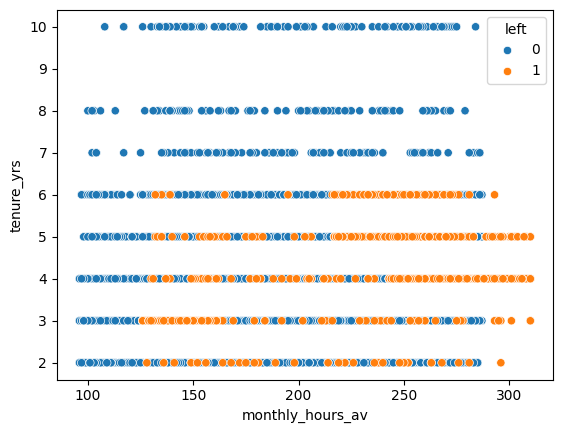

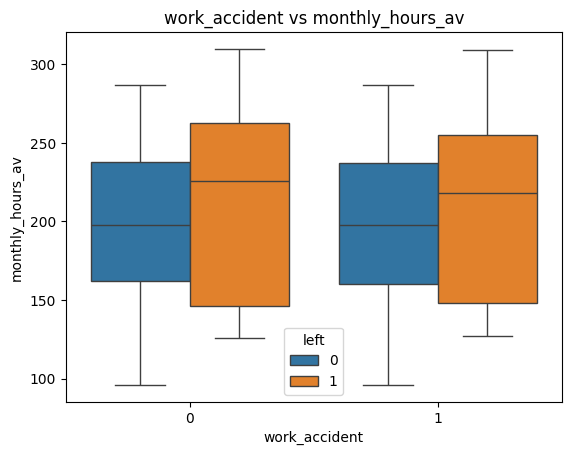

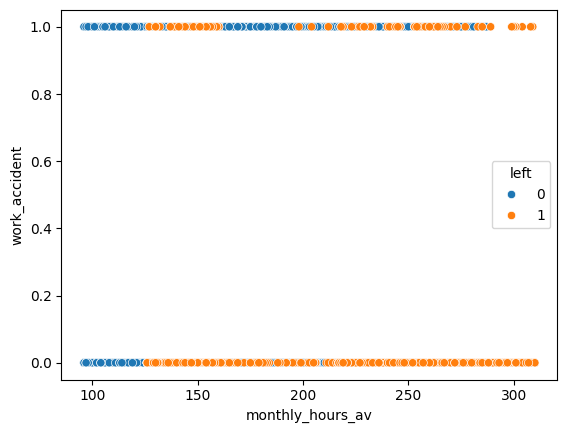

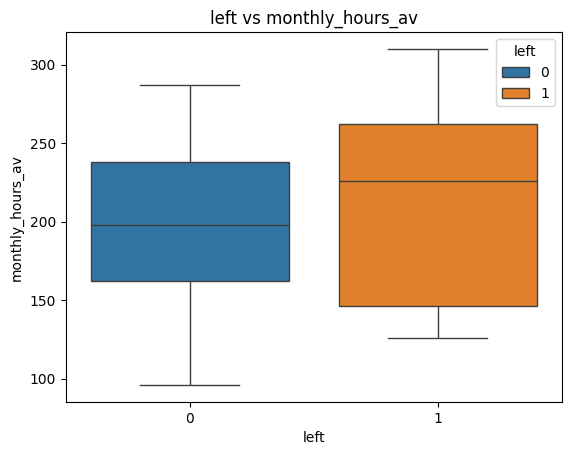

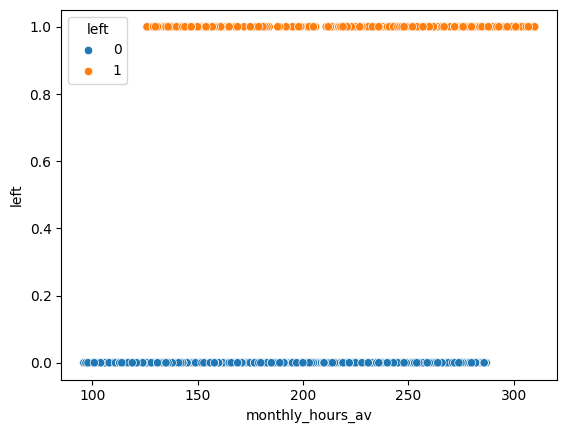

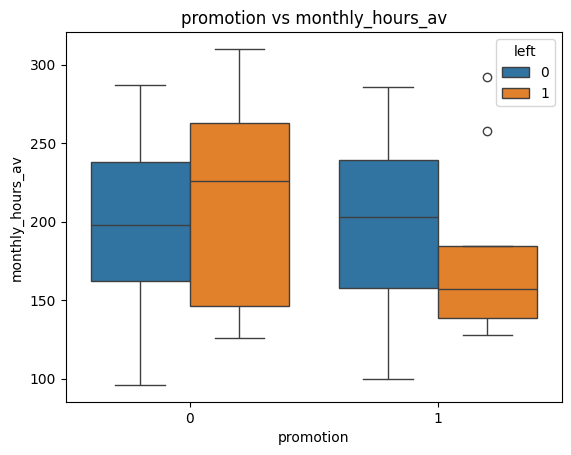

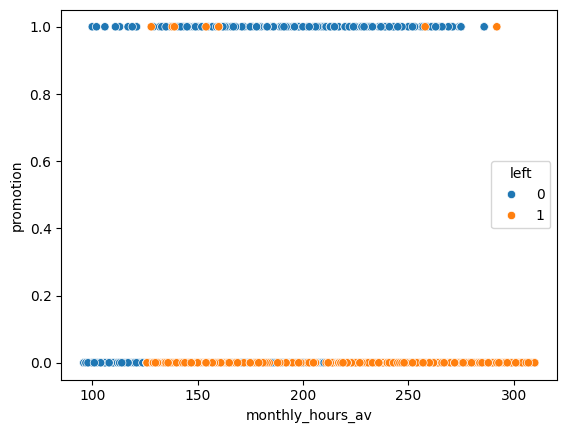

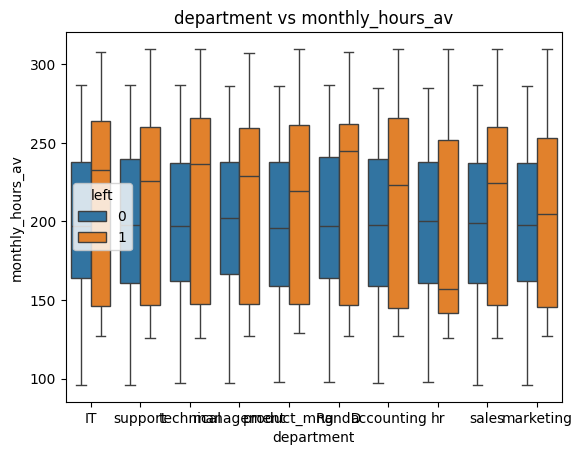

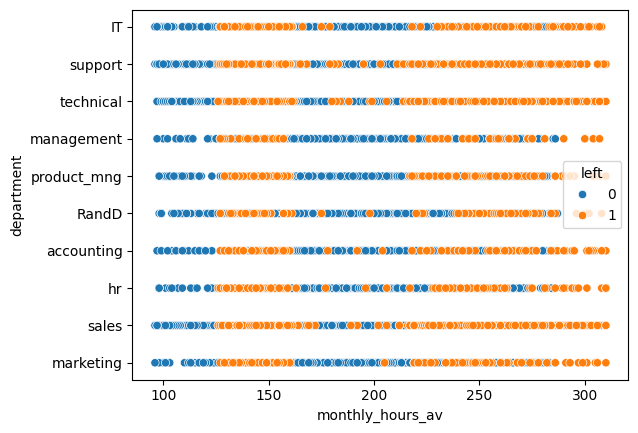

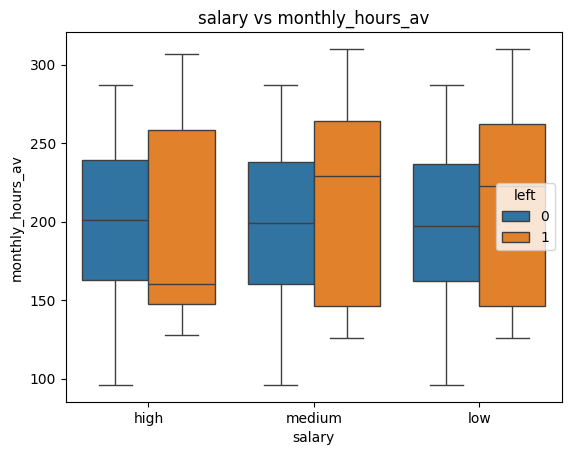

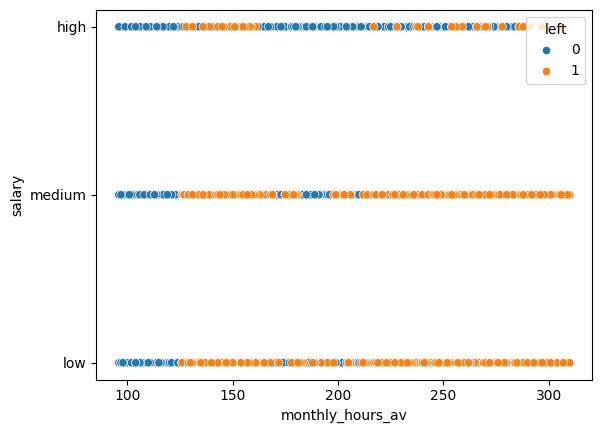

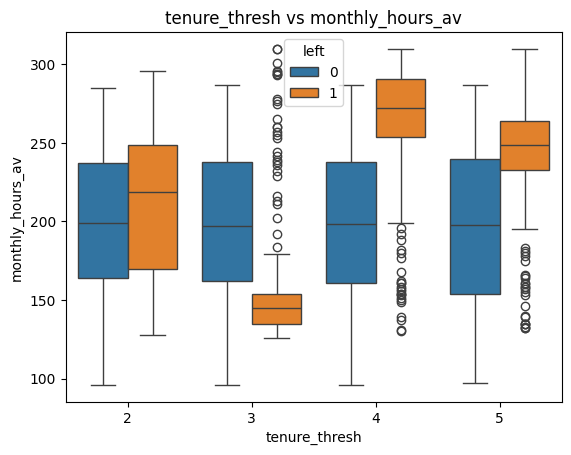

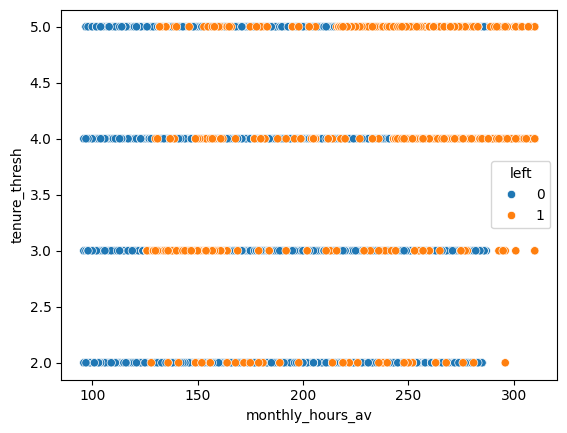

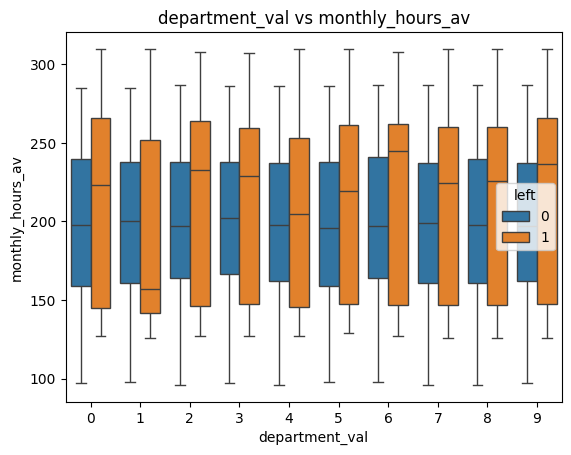

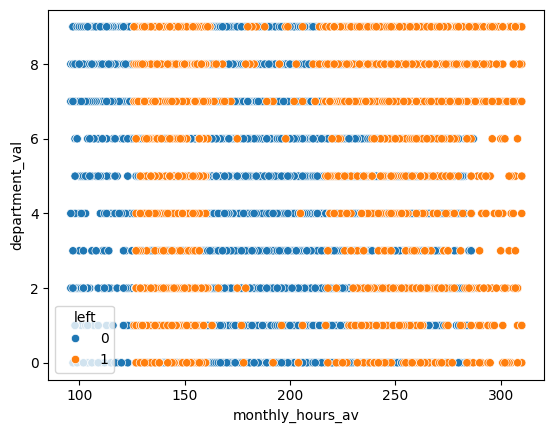

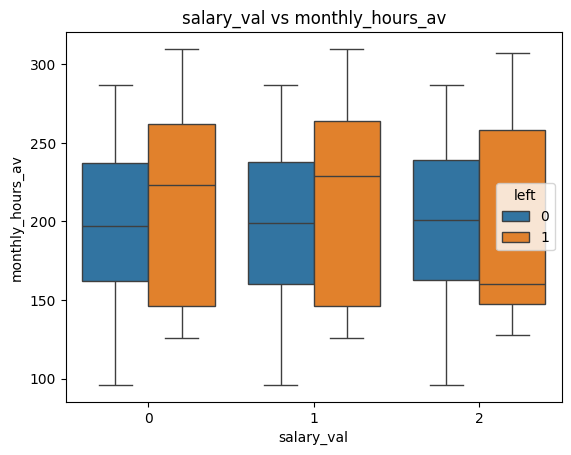

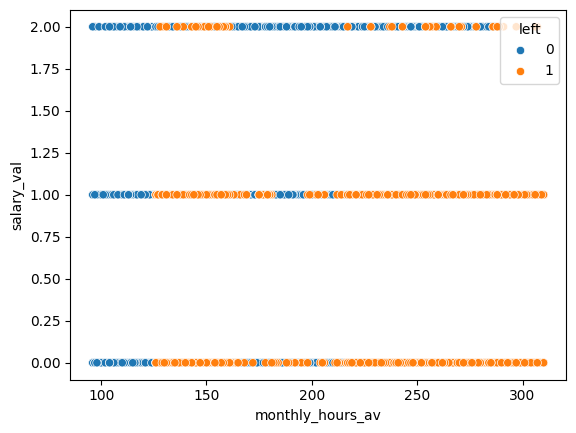

In [25]:
for n in range(0,len(columns)):
    for m in range(n+1, len(columns)):
        col1=columns[n]
        col2=columns[m]
        if (col1 in ["satisfaction", "monthly_hours_av", "performance_scr"]) and (col2 in ["satisfaction", "monthly_hours_av", "performance_scr"]):
            kde_scatterplot(df_unq, col1, col2, "left")
            
        elif (col1 in ["satisfaction", "monthly_hours_av", "performance_scr"]) or (col2 in ["satisfaction", "monthly_hours_av", "performance_scr"]):
            make_boxplot(df_unq, col1, col2, "left")
            sns.scatterplot(data=df_unq, x=col1, y=col2, hue="left")
            plt.show()

<Axes: xlabel='satisfaction', ylabel='monthly_hours_av'>

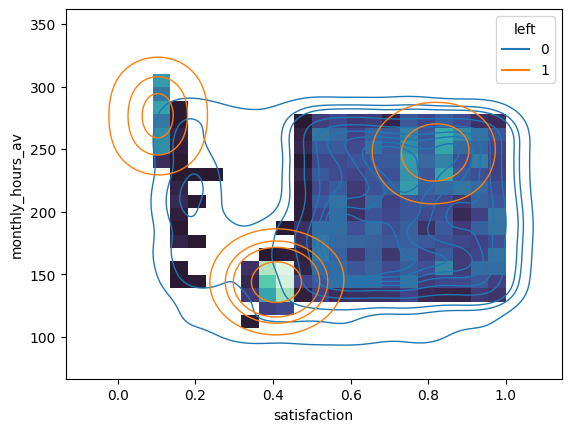

In [26]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(data=df_unq, x="satisfaction", y="monthly_hours_av", bins=20, pthresh=.1, cmap="mako")
sns.kdeplot(data=df_unq, x="satisfaction", y="monthly_hours_av", linewidths=1, hue="left")

<Axes: xlabel='performance_scr', ylabel='monthly_hours_av'>

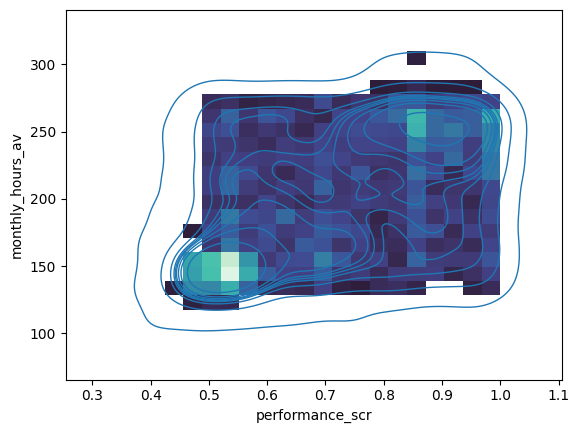

In [27]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(data=df_unq, x="performance_scr", y="monthly_hours_av", bins=20, pthresh=.1, cmap="mako")
sns.kdeplot(data=df_unq, x="performance_scr", y="monthly_hours_av", linewidths=1)

<Axes: >

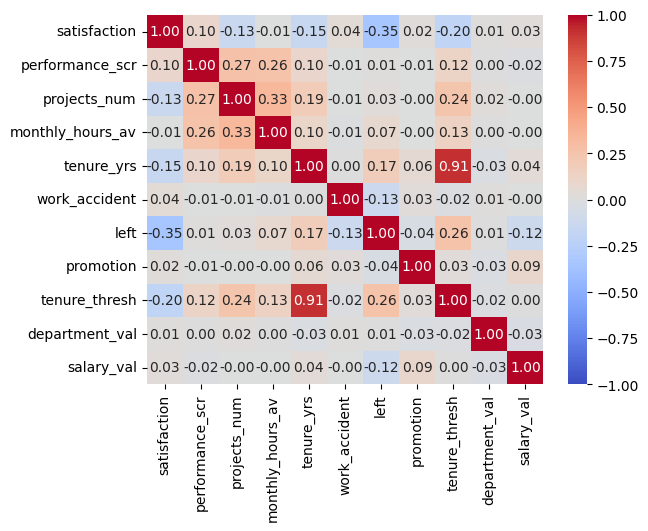

In [28]:
corr_matrix = df_unq.corr(numeric_only=True)
corr_matrix

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

In [29]:
analysis_notes.append(["df_unq", "Correlation between tenure_yrs and tenure_thresh", "remove tenure_yrs for logistic regression"])

In [30]:
get_group_counts(df_unq, "work_accident", "satisfaction", "work_accident groups")

count                  name       pcts
work_accident                                        
0              10141  work_accident groups  84.571762
1               1850  work_accident groups  15.428238

In [31]:
get_group_counts(df_unq, "promotion", "satisfaction", "promotion groups")

count              name       pcts
promotion                                    
0          11788  promotion groups  98.307064
1            203  promotion groups   1.692936

### Insights

There is little to no colinearity between columns.
The continuous columns appear to distribute into two or three main regions.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


In [33]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression

In [34]:
#I will subset a final dataset to ensure one dataset is not used for analysis.  Any downstream processing will have to occur on both sets of data.
y=df_unq["left"]
X=df_unq.copy().drop(columns=["left"])

X_tr, X_final, y_tr, y_final = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.2, random_state=0, stratify=y_tr)

🔎
**Logistic Regression model assumptions**
- Outcome variable is categorical  - _Outcome variable == left_
- Observations are independent of each other - _Met_
- No severe multicollinearity among X variables - _Met_
- No extreme outliers - _Must Remove Outliers in tenure_yrs_ 
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size - _Met_





In [38]:
def clean_dataframe_for_logreg_unoptimized(X_df):
    df=X_df.drop(columns=["department", "salary", "work_accident", "tenure_yrs"])
    return df

def clean_dataframe_for_logreg_onehot(X_df):
    dpts=pd.get_dummies(X_df["department"], drop_first=True)
    cols=dpts.columns
    cols_new=["department_"+e for e in cols]
    col_dict={}
    for a,b in zip(cols,cols_new):
        col_dict[a]=b
    dpts.rename(columns=col_dict, inplace=True)
    df=pd.concat([X_df, dpts], axis=1)
    
    sals=pd.get_dummies(X_df["salary_val"], drop_first=True).rename(columns={1:"salary_medium", 2:"salary_high"})
    df=pd.concat([df, sals], axis=1)
    df=df.drop(columns=["department", "work_accident", "tenure_yrs", "salary", "salary_val", "department_val"])
    
    return df

def clean_dataframe_for_logreg_subset(X_df):
    df=clean_dataframe_for_logreg_onehot(X_df)
    cols=[e for e in df.columns if "department" in e]
    df=df.drop(columns=cols)
    return df

def analyze_logreg_fit(model):
    print ("Coefficients: {}".format(model.coef_))
    print ("Intercepts: {}".format(model.intercept_))
    
def return_analysis_metrics(y_test, y_pred, model_name:str):
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred )
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
    specificity = tn / (tn + fp)
    
    l=[model_name, accuracy, precision, recall, f1, specificity]
    df=pd.DataFrame([l], columns=["name", "accuracy", "precision", "recall", "f1", "specificity"])
    return df
        

In [39]:
def perform_and_analyze_logisticregression(X_train, X_val, y_train, y_val, cleaning_funct:str, model_name:str):
    X_train_uo=eval("{}(X_train)".format(cleaning_funct))
    X_val_uo=eval("{}(X_val)".format(cleaning_funct))
    
    clf=LogisticRegression(solver='liblinear').fit(X_train_uo, y_train)
    analyze_logreg_fit(clf)
    y_pred=clf.predict(X_val_uo)
    #probs=clf.predict_proba(X_val_uo)[::,-1]
    
    cm=metrics.confusion_matrix(y_val, y_pred, labels = clf.classes_)
    disp=metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
    disp.plot()
    
    print(metrics.classification_report(y_val, y_pred))
    result=return_analysis_metrics(y_val, y_pred, model_name)
    
    return clf, y_pred, result

Coefficients: [[-3.76311408  0.42901464 -0.34936053  0.00416688 -0.79590275  0.6732729
   0.01120138 -0.58868547]]
Intercepts: [-1.4042524]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      1600
           1       0.40      0.18      0.24       319

    accuracy                           0.82      1919
   macro avg       0.62      0.56      0.57      1919
weighted avg       0.78      0.82      0.79      1919



name  accuracy  precision    recall        f1  \
0  Logistic Regression - Unoptimized  0.818656   0.397163  0.175549  0.243478   

   specificity  
0     0.946875

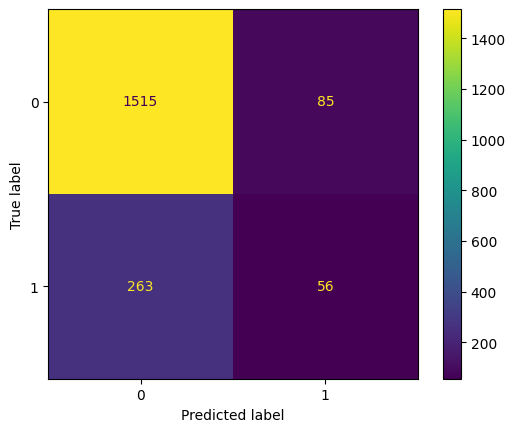

In [40]:
lr_uo, y_pred_up, df_res_uo = perform_and_analyze_logisticregression(X_train, X_val, y_train, y_val, "clean_dataframe_for_logreg_unoptimized", "Logistic Regression - Unoptimized" )
df_res=df_res_uo.copy()
df_res

Coefficients: [[-3.7507818   0.43525849 -0.35436724  0.00441665 -0.91985952  0.68549976
  -0.5176101   0.01197215 -0.08659738 -0.24715181  0.00705433 -0.08552871
  -0.01138377  0.12869671  0.03297708 -0.3915393  -1.78597346]]
Intercepts: [-1.46383592]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1600
           1       0.41      0.20      0.27       319

    accuracy                           0.82      1919
   macro avg       0.63      0.57      0.58      1919
weighted avg       0.78      0.82      0.79      1919



name  accuracy  precision    recall        f1  \
0  Logistic Regression - Unoptimized  0.818656   0.397163  0.175549  0.243478   
0       Logistic Regression - Onehot  0.818656   0.407643  0.200627  0.268908   

   specificity  
0     0.946875  
0     0.941875

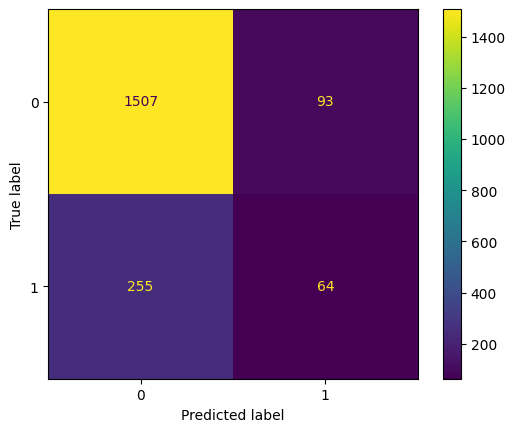

In [41]:
lr_onehot, y_pred_onehot, df_res_onehot = perform_and_analyze_logisticregression(X_train, X_val, y_train, y_val, "clean_dataframe_for_logreg_onehot", "Logistic Regression - Onehot" )
df_res=pd.concat([df_res, df_res_onehot], axis=0)
df_res

Coefficients: [[-3.74402693  0.43646685 -0.3519586   0.00428681 -0.8919516   0.67684558
  -0.39279547 -1.74362218]]
Intercepts: [-1.43892134]
              precision    recall  f1-score   support

           0       0.85      0.94      0.90      1600
           1       0.39      0.19      0.25       319

    accuracy                           0.82      1919
   macro avg       0.62      0.57      0.58      1919
weighted avg       0.78      0.82      0.79      1919



name  accuracy  precision    recall        f1  \
0  Logistic Regression - Unoptimized  0.818656   0.397163  0.175549  0.243478   
0       Logistic Regression - Onehot  0.818656   0.407643  0.200627  0.268908   
0       Logistic Regression - subset  0.817092   0.394737  0.188088  0.254777   

   specificity  
0     0.946875  
0     0.941875  
0     0.942500

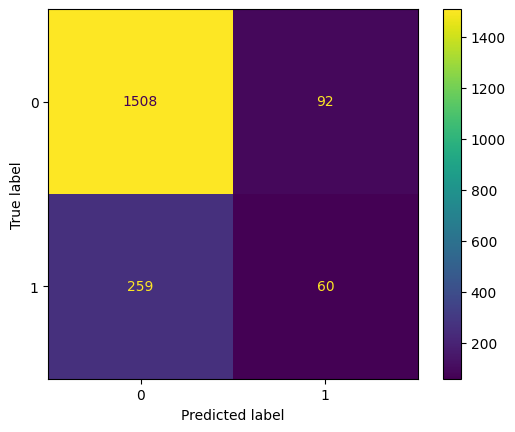

In [42]:
lr_subset, y_pred_subset, df_res_subset=perform_and_analyze_logisticregression(X_train, X_val, y_train, y_val, 
                                                                               "clean_dataframe_for_logreg_subset", 
                                                                               "Logistic Regression - subset" )

df_res=pd.concat([df_res, df_res_subset], axis=0)
df_res

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the types of models most appropriate for this task.

Decission Tree
may want to predict cluster family for some of the continuous variable first using kmeans clustering

### Modeling

In [43]:
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import sklearn.metrics as metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [53]:
def clean_dataframe_for_dectree(X_df):
    dpts=pd.get_dummies(X_df["department"], drop_first=True)
    cols=dpts.columns
    cols_new=["department_"+e for e in cols]
    col_dict={}
    for a,b in zip(cols,cols_new):
        col_dict[a]=b
    dpts.rename(columns=col_dict, inplace=True)
    df=pd.concat([X_df, dpts], axis=1)
    
    sals=pd.get_dummies(X_df["salary_val"], drop_first=True).rename(columns={1:"salary_medium", 2:"salary_high"})
    df=pd.concat([df, sals], axis=1)
    df=df.drop(columns=["department", "salary", "salary_val", "department_val"])
    
    return df

def model_analysis(y_val, y_pred, model, model_name:str):
    cm=metrics.confusion_matrix(y_val, y_pred, labels = model.classes_)
    disp=metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
    disp.plot()
    
    print(metrics.classification_report(y_val, y_pred))
    result=return_analysis_metrics(y_val, y_pred, model_name)
    return result

def perform_and_analyze_decisiontree(X_train, X_val, y_train, y_val, cleaning_funct:str, model_name:str):
    X_train_uo=eval("{}(X_train)".format(cleaning_funct))
    X_val_uo=eval("{}(X_val)".format(cleaning_funct))
    
    clf=DecisionTreeClassifier(random_state=0).fit(X_train_uo, y_train)
    y_pred=clf.predict(X_val_uo)
    #probs=clf.predict_proba(X_val_uo)[::,-1]
    
    result=model_analysis(y_val, y_pred, clf, model_name)
    return clf, y_pred, result, X_val_uo.columns


              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1600
           1       0.90      0.91      0.91       319

    accuracy                           0.97      1919
   macro avg       0.94      0.95      0.94      1919
weighted avg       0.97      0.97      0.97      1919



name  accuracy  precision    recall        f1  \
0  Logistic Regression - Unoptimized  0.818656   0.397163  0.175549  0.243478   
0       Logistic Regression - Onehot  0.818656   0.407643  0.200627  0.268908   
0       Logistic Regression - subset  0.817092   0.394737  0.188088  0.254777   
0            decsiontree_unoptimized  0.969255   0.903727  0.912226  0.907956   
0            decsiontree_unoptimized  0.969255   0.903727  0.912226  0.907956   

   specificity  
0     0.946875  
0     0.941875  
0     0.942500  
0     0.980625  
0     0.980625

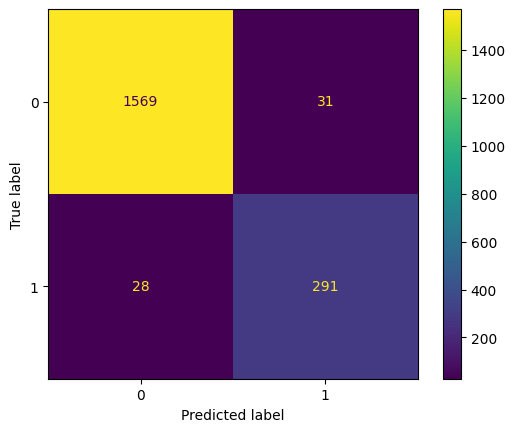

In [54]:
dt, y_pred_dt, result_dt, X_cols=perform_and_analyze_decisiontree(X_train, X_val, y_train, y_val, "clean_dataframe_for_dectree", "decsiontree_unoptimized")
df_res=pd.concat([df_res, result_dt], axis=0)
df_res

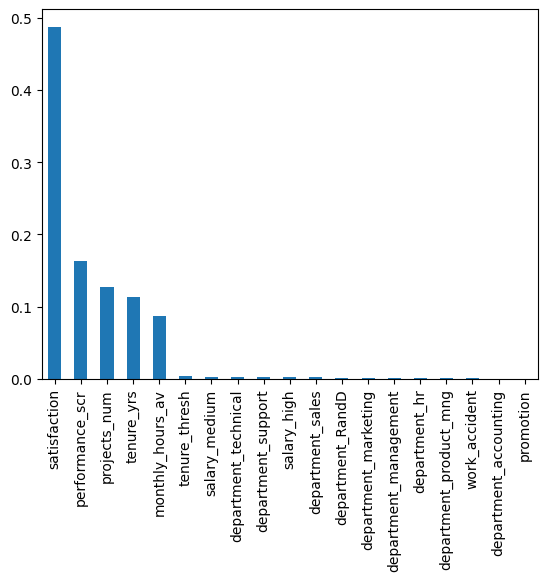

In [55]:
importances = dt.feature_importances_

forest_importances = pd.Series(importances, index=X_cols).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

In [59]:
tree_para = {'max_depth':[5,10,15, 20],
             'min_samples_leaf': [5, 10, 20],
             'max_features': [2,4,6,8,10],
             'min_samples_split': [5, 10, 20]}
scoring = ['accuracy', 'precision', 'recall', 'f1']
refit="f1"

In [60]:
X_train_cleaned=clean_dataframe_for_dectree(X_train)
dt_gs = DecisionTreeClassifier(random_state=0)

dt_gs_clf = GridSearchCV(dt_gs, 
                   tree_para, 
                   scoring = scoring, 
                   cv=5, 
                   refit=refit)

dt_gs_clf.fit(X_train_cleaned, y_train)
dt_gs_clf.best_estimator_

DecisionTreeClassifier(max_depth=10, max_features=10, min_samples_leaf=5,
                       min_samples_split=20, random_state=0)

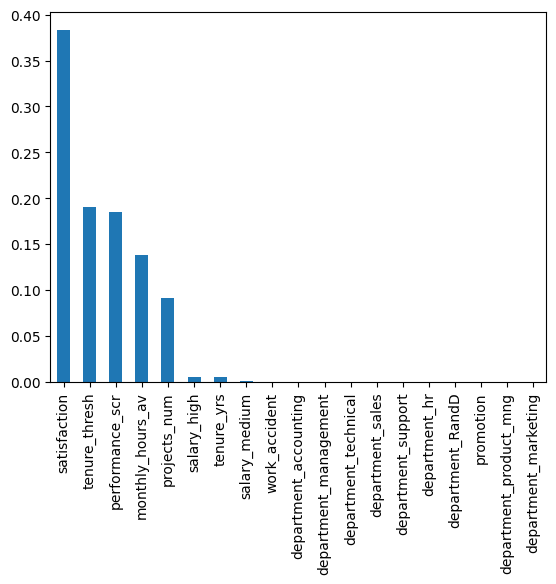

In [61]:
importances = dt_gs_clf.best_estimator_.feature_importances_

forest_importances = pd.Series(importances, index=X_train_cleaned.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax);

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2001
           1       0.88      0.90      0.89       398

    accuracy                           0.96      2399
   macro avg       0.93      0.94      0.93      2399
weighted avg       0.96      0.96      0.96      2399



name  accuracy  precision    recall        f1  \
0  Logistic Regression - Unoptimized  0.818656   0.397163  0.175549  0.243478   
0       Logistic Regression - Onehot  0.818656   0.407643  0.200627  0.268908   
0       Logistic Regression - subset  0.817092   0.394737  0.188088  0.254777   
0            decsiontree_unoptimized  0.969255   0.903727  0.912226  0.907956   
0            decsiontree_unoptimized  0.969255   0.903727  0.912226  0.907956   
0        decision_tree on final data  0.962068   0.875306  0.899497  0.887237   

   specificity  
0     0.946875  
0     0.941875  
0     0.942500  
0     0.980625  
0     0.980625  
0     0.974513

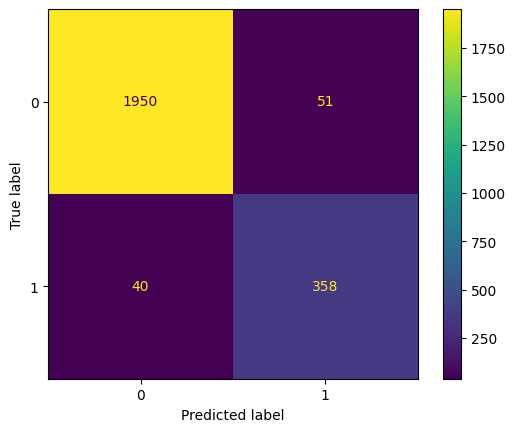

In [62]:
def analyze_test_set(X_test, y_test, model, cleaning_funct:str, model_name:str):
    X_test_uo=eval("{}(X_test)".format(cleaning_funct))
    
    y_pred=model.predict(X_test_uo)
    #probs=clf.predict_proba(X_val_uo)[::,-1]
    
    result=model_analysis(y_test, y_pred, model, model_name)
    return y_pred, result
 
y_final_pred, y_final_result=analyze_test_set(X_final, y_final, dt, "clean_dataframe_for_dectree", "decision_tree on final data")
df_res=pd.concat([df_res, y_final_result])
df_res